<a href="https://colab.research.google.com/github/sharmarahulraj03/NLP_Tasks/blob/main/Assignment_4(Part_A)__DTI5125_Rahul_Raj_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1 align="center"><b>Data Science Applications</b></H1>
<H3 align="center"><b>Assignment 4</b></H3>
<H3 align="center"><b><u>Part : A</u></b></H3>
<H5 align="left"><b><u> Instruction:</u></b></H5>
<p align="justify">This assignment should be completed individually using either Python or R. Upon completion, present your result in 
one submission, including the report, answers generated and plots. Also, submit the source codes used to generate 
your results as a separate attachment.</p>
<H5 align="left"><b><u>Part A:  Topic Modeling & Sentiment Analysis (50 Points)</u></b></H5>
<p align="justify">Sentiment analysis is useful for identifying attitudes in text data about a subject of interest. It is scored using polarity 
values that range from 1 (i.e., more positivity) to -1 (i.e., more negativity). In this part, you will:
<br>
<b>A. Estimate the public's perception of natural hazards using tweets from the tornado dataset provided</b>
<ol>
<li>Using the textblob package in python, calculate a polarity value for each tweet (10 points)
</li>
<li> Plot the polarity values in a histogram to identify the overall sentiment (10 points)
</li>
<li> What does the histogram of polarity values tell you about sentiments in the tweets? Are they positive or 
negative? (5 points)</li>
</ol></p>
<p align="justify">
<b>B.  Develop a text summarizer</b>
<ol>
<li> Preprocess the tweets & compute frequency distribution for most common 10 words (10 points)
</li>
<li>  Create a topic model using the LDA approach & extract 10 meaningful topics (15 points)
</li>
</ol></p>

**Importing required Libraries.**

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install contractions

In [2]:
#Import all the important required libraries 
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import warnings
import os
import re
import contractions
import nltk
import gensim
import seaborn as sns

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from spacy import displacy
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from spacy.lang.en import English
from collections import Counter 
from gensim import corpora
from gensim.models import CoherenceModel
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
#Importing data 
df = pd.read_excel("Tornado.xlsx", header=None)
data_size = len(df)
print(data_size)
print(df.head())
print(df.tail())

3631
                                                  0    1    2   ...   8    9    10
0  0\tRT @uberdogfound: Please RT - Food needed f...  NaN  NaN  ...  NaN  NaN  NaN
1  1\tPlease RT - Food needed for shelter in NC i...  NaN  NaN  ...  NaN  NaN  NaN
2  3\t‚ô°its raining and tornado warnings....abou...  NaN  NaN  ...  NaN  NaN  NaN
3  9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...  NaN  NaN  ...  NaN  NaN  NaN
4  10\tSaved by the tornado warning....I'm just r...  NaN  NaN  ...  NaN  NaN  NaN

[5 rows x 11 columns]
                                                     0   ...   10
3626  39\tThanks to @BarackObama and @SethMeyers21 f...  ...  NaN
3627  0\tStamford-based AmeriCares is preparing to s...  ...  NaN
3628  2\t"Semi-trailer parked at People's Church Spr...  ...  NaN
3629  3\tRT @TopNoTcH_B1tch: My mom is goin out of t...  ...  NaN
3630  6\t"Volunteers Offer Support to Southern Torna...  ...  NaN

[5 rows x 11 columns]


In [4]:
#Display imported data 
df

,0,1,2,3,4,5,6,7,8,9,10
0,0\tRT @uberdogfound: Please RT - Food needed f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1\tPlease RT - Food needed for shelter in NC i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3\t‚ô°its raining and tornado warnings....abou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10\tSaved by the tornado warning....I'm just r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3626,39\tThanks to @BarackObama and @SethMeyers21 f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3627,0\tStamford-based AmeriCares is preparing to s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3628,"2\t""Semi-trailer parked at People's Church Spr...",leaves 2pm Sun. Need water food batteries bla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3629,3\tRT @TopNoTcH_B1tch: My mom is goin out of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Creating new column with combined data 
df['Text'] = df[df.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)

In [6]:
#Displaying Combined data 
df

,0,1,2,3,4,5,6,7,8,9,10,Text
0,0\tRT @uberdogfound: Please RT - Food needed f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0\tRT @uberdogfound: Please RT - Food needed f...
1,1\tPlease RT - Food needed for shelter in NC i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1\tPlease RT - Food needed for shelter in NC i...
2,3\t‚ô°its raining and tornado warnings....abou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3\t‚ô°its raining and tornado warnings....abou...
3,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9\tLmao #damn RT @LuCeCaNNoNn: If I don't get ...
4,10\tSaved by the tornado warning....I'm just r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10\tSaved by the tornado warning....I'm just r...
...,...,...,...,...,...,...,...,...,...,...,...,...
3626,39\tThanks to @BarackObama and @SethMeyers21 f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39\tThanks to @BarackObama and @SethMeyers21 f...
3627,0\tStamford-based AmeriCares is preparing to s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0\tStamford-based AmeriCares is preparing to s...
3628,"2\t""Semi-trailer parked at People's Church Spr...",leaves 2pm Sun. Need water food batteries bla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2\t""Semi-trailer parked at People's Church Spr..."
3629,3\tRT @TopNoTcH_B1tch: My mom is goin out of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3\tRT @TopNoTcH_B1tch: My mom is goin out of t...


**1. Using the textblob package in python, calculate a polarity value for each tweet (10 points)**

In [7]:
sentiment_ob = [TextBlob(text) for text in df['Text']]

In [8]:
polarity = [sen.sentiment.polarity for sen in sentiment_ob]
print(polarity)

[-0.2916666666666667, -0.36458333333333337, -0.1, 0.6, 0.44999999999999996, 0.16666666666666666, -0.5, -0.4, 0.2, 0.0, 0.0, 0.6, -0.15833333333333333, 0.625, -0.1375, 0.2125, 0.14166666666666666, -0.1, 0.25, -0.152587890625, -0.125, -0.125, 0.2, 0.625, 0.125, 0.4, 0.2, 0.3666666666666667, 0.6000000000000001, 0.2, -0.25, 0.38125, -0.125, -0.07500000000000001, -0.07500000000000001, 0.08333333333333333, -0.1, 0.2, 0.05000000000000002, 0.5, -0.5833333333333334, -0.05, 0.75, -0.30185185185185187, 0.8, -0.625, 1.0, 0.5, 0.25, 1.0, -0.25, 0.2869318181818182, 0.4, -0.25, -0.4, 0.1787878787878788, -0.1125, 0.5, 0.34285714285714286, 0.5083333333333333, -0.4, -0.5, -0.025000000000000022, 0.4, 0.0, 0.04999999999999999, 0.6825, 0.2, 0.375, -0.2, 0.5, 0.56875, 0.56875, 0.2869318181818182, 1.0, 1.0, 0.16818181818181818, 0.13636363636363635, 0.7, 0.13636363636363635, 0.4, 0.1, 0.13636363636363635, 0.13636363636363635, 0.25757575757575757, 0.1, 0.5, -0.1, -0.026767676767676756, 0.23333333333333336, 0.5

**2. Plot the polarity values in a histogram to identify the overall sentiment (10 points)**

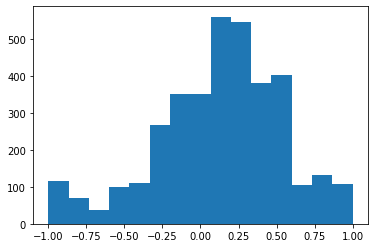

In [9]:
#Plotting graph for Polarity without preprocessing the data
plt.hist(polarity, bins=15)
plt.show()

**3. What does the histogram of polarity values tell you about sentiments in the tweets? Are they positive or negative? (5 points)**

**Ans :** The polarity histogram is plotted from -1 to 1, with a plot from -1 to 0 representing negative sentiment tweets and a plot from 0 to +1 representing positive sentiment tweets. Tweets with a sentiment of 0 are considered neutral. If we carefully observe the histogram map, we can see that the mean of the bell curve varies from 0 to 0.15 polarity magnitude, implying that the majority of tweets have a positive feeling.

The histogram of polarity values is tilted to the left and fits the Gaussian distribution/Normal distribution, suggesting that the bulk of total tweets are optimistic in nature. The second metric compares the cumulative number of tweets for positive and negative polarity/sentiment. The overall number of positive sentiments outnumbers the total number of negative sentiments.

**B. Develop a text summarizer**

**Preprocessing the data**

In [10]:
df['Text'] = [re.sub(r'@\w+|http\S+|www\S+|#\S+',"",line.lower()) for line in df['Text']]

In [11]:
punc = set([word for line in df['Text'] for word in line if not word.isalnum()])
punc.remove(' ')
punc.remove("'")
remove = '|'.join('\\'+i for i in punc)

In [12]:
df['Text'] = df['Text'].apply(lambda x: re.sub(remove, ' ', x))

In [13]:
def remove_numbers_punctuation(text):
    return re.sub('[^a-zA-Z,,.!:;]' , ' ', text)

def remove_brackets(text):
    return re.sub('\[[^]]*\]', "", text)

def remove_num_brac_punct(text):
    text = remove_numbers_punctuation(text)
    text = remove_brackets(text)
    return text

df['Text'] = df['Text'].apply(remove_num_brac_punct)
df['Text']

0         rt   please rt   food needed for shelter in ...
1         please rt   food needed for shelter in nc in...
2            its raining and tornado warnings    about...
3         lmao  rt   if i don t get any food i hope th...
4          saved by the tornado warning    i m just re...
                              ...                        
3626       thanks to  and  for making me laugh so hard...
3627      stamford based americares is preparing to se...
3628       semi trailer parked at people s church spri...
3629      rt   my mom is goin out of town today to hel...
3630       volunteers offer support to southern tornad...
Name: Text, Length: 3631, dtype: object

In [14]:
for text in df['Text'].head():
    print(text)

  rt   please rt   food needed for shelter in nc in area that was hit hard by tornado  please contact us at           
  please rt   food needed for shelter in nc in area that was hit hard by tornado   please contact us at info org to help           
     its raining and tornado warnings    about to be in a coma from eating all this food in a few                     
  lmao  rt   if i don t get any food i hope the tornado blow all yall food out yall mouth             
   saved by the tornado warning    i m just ready to eat this good food            


In [15]:
sentiment_ob_after_clean = [TextBlob(text) for text in df['Text']]

In [16]:
polarity_after_clean = [sen.sentiment.polarity for sen in sentiment_ob_after_clean]

**Plotting graph of polarity after preprocessing the data**

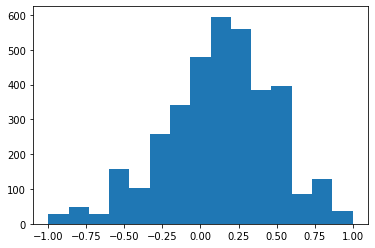

In [17]:
plt.hist(polarity_after_clean, bins=15)
plt.show()

In [18]:
d = contractions.contractions_dict

In [19]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([d[wor] if wor in d.keys() else wor for wor in x.split()]))

In [20]:
for text in df['Text'].head():
    print(text)

rt please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at
please rt food needed for shelter in nc in area that was hit hard by tornado please contact us at info org to help
its raining and tornado warnings about to be in a coma from eating all this food in a few
lmao rt if i don t get any food i hope the tornado blow all yall food out yall mouth
saved by the tornado warning i m just ready to eat this good food


In [21]:
st_words = set(stopwords.words('english'))

In [22]:
df['Text'] = df['Text'].apply(lambda x: [word for word in x.split() if word not in st_words])

In [23]:
for text in df['Text'].head():
    print(text)

['rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us']
['please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'us', 'info', 'org', 'help']
['raining', 'tornado', 'warnings', 'coma', 'eating', 'food']
['lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth']
['saved', 'tornado', 'warning', 'ready', 'eat', 'good', 'food']


In [24]:
wnl = WordNetLemmatizer()

In [25]:
df['Text'] = df['Text'].apply(lambda x: [wnl.lemmatize(word) for word in x])

In [26]:
for text in df['Text'].head():
    print(text)

['rt', 'please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u']
['please', 'rt', 'food', 'needed', 'shelter', 'nc', 'area', 'hit', 'hard', 'tornado', 'please', 'contact', 'u', 'info', 'org', 'help']
['raining', 'tornado', 'warning', 'coma', 'eating', 'food']
['lmao', 'rt', 'get', 'food', 'hope', 'tornado', 'blow', 'yall', 'food', 'yall', 'mouth']
['saved', 'tornado', 'warning', 'ready', 'eat', 'good', 'food']


**1. Preprocess the tweets & compute frequency distribution for most common 10 words (10 points)**

In [27]:
#convert lemmatized tokens into sentences 
df_lemmatize_data = ','.join([item for sub_list in df['Text'] for item in sub_list])
nlp = English()

In [28]:
#to increase length 
nlp.max_length = 40000000

In [29]:
df_lemmatize_inter = nlp(df_lemmatize_data)
# get all tokens that aren't punctuation
df_lemmatize_inter1 = [token.text for token in df_lemmatize_inter if token.is_punct != True]
# get the frequency of each word (token) in the  string
all_word_freq = Counter(df_lemmatize_inter1)
all_word_freq

Counter({'rt': 721,
         'please': 120,
         'food': 530,
         'needed': 13,
         'shelter': 1673,
         'nc': 19,
         'area': 100,
         'hit': 136,
         'hard': 18,
         'tornado': 3465,
         'contact': 4,
         'u': 240,
         'info': 12,
         'org': 3,
         'help': 71,
         'raining': 12,
         'warning': 536,
         'coma': 2,
         'eating': 5,
         'lmao': 42,
         'get': 281,
         'hope': 97,
         'blow': 15,
         'yall': 19,
         'mouth': 2,
         'saved': 2,
         'ready': 46,
         'eat': 20,
         'good': 126,
         'uh': 9,
         'mr': 7,
         'tummy': 3,
         'already': 23,
         'hurt': 9,
         'much': 32,
         'candy': 2,
         'face': 7,
         'bit': 10,
         'green': 16,
         'accepting': 5,
         'donation': 35,
         'distributed': 2,
         'victim': 167,
         'eastern': 11,
         'part': 77,
         'state': 17

In [30]:
# get the 10 most frequent words
top_ten_words = all_word_freq.most_common(10)
# view the 10 most common words
top_ten_words

[('tornado', 3465),
 ('shelter', 1673),
 ('car', 1144),
 ('rt', 721),
 ('take', 540),
 ('warning', 536),
 ('food', 530),
 ('seek', 423),
 ('ride', 293),
 ('get', 281)]

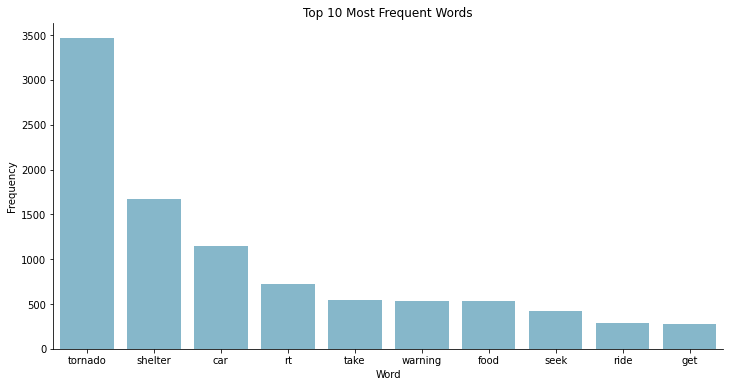

In [31]:
#Converting word frequency into dataframes
frequency_df = pd.DataFrame.from_dict(all_word_freq, orient='index').reset_index()
# rename the columns to "word" and "freq"
frequency_df.columns=["word", "freq"]
#Plotting Graph for top 20 words
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=frequency_df.sort_values(by="freq", ascending=False).head(10), 
            y="freq", 
            x="word", 
            color='#7bbcd5')
plt.ylabel("Frequency")
plt.xlabel("Word")
plt.title("Top 10 Most Frequent Words")
sns.despine();

**2. Create a topic model using the LDA approach & extract 10 meaningful topics (15 points)**

In [32]:
dictionary = corpora.Dictionary(df["Text"].tolist())

In [33]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df["Text"]]

In [34]:
lda = gensim.models.ldamodel.LdaModel

In [35]:
lda_model = lda(doc_term_matrix, num_topics=10, id2word=dictionary, passes=20)

In [36]:
print(lda_model.print_topics())

[(0, '0.076*"tornado" + 0.073*"shelter" + 0.044*"take" + 0.042*"rt" + 0.029*"al" + 0.026*"tuscaloosa" + 0.015*"destructive" + 0.015*"ripping" + 0.013*"ground" + 0.012*"near"'), (1, '0.066*"tornado" + 0.059*"shelter" + 0.031*"safe" + 0.026*"place" + 0.020*"stop" + 0.020*"go" + 0.019*"sound" + 0.019*"like" + 0.019*"rt" + 0.018*"take"'), (2, '0.087*"ride" + 0.081*"tornado" + 0.016*"shelter" + 0.015*"like" + 0.015*"siren" + 0.012*"warning" + 0.010*"good" + 0.010*"home" + 0.009*"going" + 0.009*"go"'), (3, '0.122*"car" + 0.065*"tornado" + 0.013*"get" + 0.009*"weather" + 0.009*"vehicle" + 0.009*"two" + 0.008*"ok" + 0.008*"lot" + 0.007*"better" + 0.007*"run"'), (4, '0.067*"tornado" + 0.057*"car" + 0.027*"food" + 0.025*"victim" + 0.017*"help" + 0.011*"road" + 0.010*"hail" + 0.008*"one" + 0.008*"park" + 0.008*"across"'), (5, '0.040*"tornado" + 0.028*"food" + 0.026*"rt" + 0.015*"away" + 0.012*"water" + 0.012*"clean" + 0.011*"day" + 0.011*"bring" + 0.011*"caught" + 0.010*"relief"'), (6, '0.038*"to

In [37]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.076*"tornado" + 0.073*"shelter" + 0.044*"take" + 0.042*"rt" + 0.029*"al" + 0.026*"tuscaloosa" + 0.015*"destructive" + 0.015*"ripping" + 0.013*"ground" + 0.012*"near"')
(1, '0.066*"tornado" + 0.059*"shelter" + 0.031*"safe" + 0.026*"place" + 0.020*"stop" + 0.020*"go" + 0.019*"sound" + 0.019*"like" + 0.019*"rt" + 0.018*"take"')
(2, '0.087*"ride" + 0.081*"tornado" + 0.016*"shelter" + 0.015*"like" + 0.015*"siren" + 0.012*"warning" + 0.010*"good" + 0.010*"home" + 0.009*"going" + 0.009*"go"')
(3, '0.122*"car" + 0.065*"tornado" + 0.013*"get" + 0.009*"weather" + 0.009*"vehicle" + 0.009*"two" + 0.008*"ok" + 0.008*"lot" + 0.007*"better" + 0.007*"run"')
(4, '0.067*"tornado" + 0.057*"car" + 0.027*"food" + 0.025*"victim" + 0.017*"help" + 0.011*"road" + 0.010*"hail" + 0.008*"one" + 0.008*"park" + 0.008*"across"')
(5, '0.040*"tornado" + 0.028*"food" + 0.026*"rt" + 0.015*"away" + 0.012*"water" + 0.012*"clean" + 0.011*"day" + 0.011*"bring" + 0.011*"caught" + 0.010*"relief"')
(6, '0.038*"tornado" 

In [38]:
print('\nPerplexity:', lda_model.log_perplexity(doc_term_matrix))

coherence_score_lda = CoherenceModel(model=lda_model, texts=df['Text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_score_lda.get_coherence()

print('\nCoherence Score:', coherence_score)


Perplexity: -7.1002333525111325

Coherence Score: 0.3017943511450268


<H5 align="left"><b> Thank you </b></H5>
<H5 align="left"><b> Assignment -4 Part A: Topic Modeling & Sentiment Analysis </b></H5>
<H5 align="left"><b> Prepared and Submitted By : Rahul Raj Sharma </b></H5>